In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install statsmodels
!pip install pandas_datareader
!pip install datetime
!pip install yfinance
!pip install scikit-learn
!pip install PyPortfolioOpt


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 5.3 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 5.6 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.8 MB 6.2 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 6.3 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------- ----------------------- 1.6/3.8 MB 7.6 MB/s eta 0:00:01
   -------------------------------- ------- 3.1/3.8 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 7.1 MB/s eta 0:00:00
     ---------------------

In [8]:
!pip install pandas-ta


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218927 sha256=0093572ceffa233918cad31425e550f15d8e27af2a9cbe2b6022d1fe4bab5625
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\fd\ed\18\2a12fd1b7906c63efca6accb351929f2c7f6bbc674e1c0ba5d
Successfully built pandas-ta


In [241]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta 
import warnings
warnings.filterwarnings('ignore')

In [242]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')[0]
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [243]:
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')
symbols_list = sp500['Symbol'].unique().tolist()
end_date = '2024-09-02'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)

In [244]:
# df = yf.download(tickers = symbols_list, start = start_date, end = end_date).stack()
# df.index.names = ['date', 'ticker'] #sets the multiframe indexing 
# df.columns = df.columns.str.lower()
df # data for each stock for each day 

Price                              adj close       close        high  \
date                      ticker                                       
2016-09-06 00:00:00+00:00 A        44.091301   46.950001   47.110001   
                          AAL      35.625732   36.959999   36.970001   
                          AAPL     24.835476   26.924999   27.075001   
                          ABBV     45.769600   64.610001   64.900002   
                          ABT      36.419403   42.160000   42.320000   
...                                      ...         ...         ...   
2024-08-30 00:00:00+00:00 XYL     137.529999  137.529999  137.839996   
                          YUM     134.919998  134.919998  135.899994   
                          ZBH     115.459999  115.459999  115.930000   
                          ZBRA    345.380005  345.380005  345.660004   
                          ZTS     183.490005  183.490005  184.220001   

Price                                    low        open       volume  \
date                      ticker                                        
2016-09-06 00:00:00+00:00 A        46.720001   46.900002    1460900.0   
                          AAL      36.360001   36.450001    5501700.0   
                          AAPL     26.877501   26.975000  107521600.0   
                          ABBV     64.050003   64.699997    6286300.0   
                          ABT      41.799999   42.099998    7079100.0   
...                                      ...         ...          ...   
2024-08-30 00:00:00+00:00 XYL     135.300003  136.059998    1263100.0   
                          YUM     134.410004  135.440002    1892900.0   
                          ZBH     114.610001  114.949997    1584900.0   
                          ZBRA    337.929993  345.320007     453500.0   
                          ZTS     180.979996  183.089996    2328500.0   

Price                             garman_klass_vol        rsi    bb_low  \
date                      ticker                                          
2016-09-06 00:00:00+00:00 A              -0.001439        NaN       NaN   
                          AAL            -0.000064        NaN       NaN   
                          AAPL           -0.002611        NaN       NaN   
                          ABBV           -0.046196        NaN       NaN   
                          ABT            -0.008039        NaN       NaN   
...                                            ...        ...       ...   
2024-08-30 00:00:00+00:00 XYL             0.000128  56.143134  4.835562   
                          YUM             0.000055  52.565930  4.901952   
                          ZBH             0.000058  60.688503  4.665776   
                          ZBRA            0.000256  57.953794  5.745825   
                          ZTS             0.000156  54.037389  5.187591   

Price                               bb_mid   bb_high       atr      macd  \
date                      ticker                                           
2016-09-06 00:00:00+00:00 A            NaN       NaN       NaN       NaN   
                          AAL          NaN       NaN       NaN       NaN   
                          AAPL         NaN       NaN       NaN       NaN   
                          ABBV         NaN       NaN       NaN       NaN   
                          ABT          NaN       NaN       NaN       NaN   
...                                    ...       ...       ...       ...   
2024-08-30 00:00:00+00:00 XYL     4.891880  4.948198  0.738146  0.220335   
                          YUM     4.917853  4.933755  0.332249  0.361892   
                          ZBH     4.719178  4.772580 -0.861545  0.634740   
                          ZBRA    5.819359  5.892892  0.126582  0.597867   
                          ZTS     5.217212  5.246833  0.365398  0.102848   

Price                             dollar_volume  
date                      ticker                 
2016-09-06 00:00:00+00:00 A           64.412982 

In [245]:
# df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2)/2 - (2*np.log(2)-1)*((np.log(df['adj close']) - np.log(df['open']))**2)

# df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close = x, length = 20))

# df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length = 20).iloc[:,0])

# df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length = 20).iloc[:,1])

# df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length = 20).iloc[:,2])

# def compute_atr(stock_data):
#         atr = pandas_ta.atr(high = stock_data['high'], low = stock_data['low'], close = stock_data['close'], length = 14)
#         return (atr.sub(atr.mean())).div(atr.std())
# df['atr'] = df.groupby(level = 1, group_keys = False).apply(compute_atr)

# def compute_macd(close):
#     macd = pandas_ta.macd(close = close, length = 20).iloc[:,0]
#     return macd.sub(macd.mean()).div(macd.std())

# df['macd'] = df.groupby(level = 1, group_keys = False)['adj close'].apply(compute_macd)

df['dollar_volume'] = (df['adj close']* df['volume'])/1e6

<Axes: xlabel='date'>

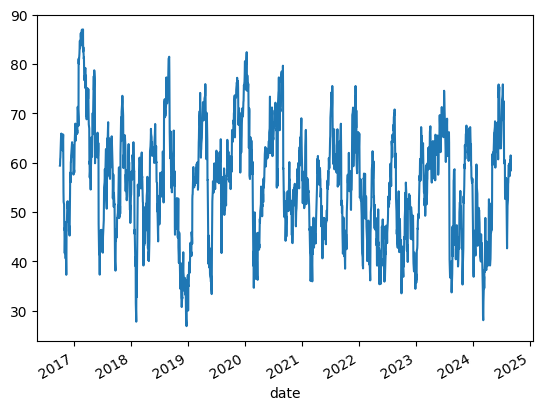

In [246]:
df.xs('AAPL', level = 1)['rsi'].plot()

In [247]:
df

Price                              adj close       close        high  \
date                      ticker                                       
2016-09-06 00:00:00+00:00 A        44.091301   46.950001   47.110001   
                          AAL      35.625732   36.959999   36.970001   
                          AAPL     24.835476   26.924999   27.075001   
                          ABBV     45.769600   64.610001   64.900002   
                          ABT      36.419403   42.160000   42.320000   
...                                      ...         ...         ...   
2024-08-30 00:00:00+00:00 XYL     137.529999  137.529999  137.839996   
                          YUM     134.919998  134.919998  135.899994   
                          ZBH     115.459999  115.459999  115.930000   
                          ZBRA    345.380005  345.380005  345.660004   
                          ZTS     183.490005  183.490005  184.220001   

Price                                    low        open       volume  \
date                      ticker                                        
2016-09-06 00:00:00+00:00 A        46.720001   46.900002    1460900.0   
                          AAL      36.360001   36.450001    5501700.0   
                          AAPL     26.877501   26.975000  107521600.0   
                          ABBV     64.050003   64.699997    6286300.0   
                          ABT      41.799999   42.099998    7079100.0   
...                                      ...         ...          ...   
2024-08-30 00:00:00+00:00 XYL     135.300003  136.059998    1263100.0   
                          YUM     134.410004  135.440002    1892900.0   
                          ZBH     114.610001  114.949997    1584900.0   
                          ZBRA    337.929993  345.320007     453500.0   
                          ZTS     180.979996  183.089996    2328500.0   

Price                             garman_klass_vol        rsi    bb_low  \
date                      ticker                                          
2016-09-06 00:00:00+00:00 A              -0.001439        NaN       NaN   
                          AAL            -0.000064        NaN       NaN   
                          AAPL           -0.002611        NaN       NaN   
                          ABBV           -0.046196        NaN       NaN   
                          ABT            -0.008039        NaN       NaN   
...                                            ...        ...       ...   
2024-08-30 00:00:00+00:00 XYL             0.000128  56.143134  4.835562   
                          YUM             0.000055  52.565930  4.901952   
                          ZBH             0.000058  60.688503  4.665776   
                          ZBRA            0.000256  57.953794  5.745825   
                          ZTS             0.000156  54.037389  5.187591   

Price                               bb_mid   bb_high       atr      macd  \
date                      ticker                                           
2016-09-06 00:00:00+00:00 A            NaN       NaN       NaN       NaN   
                          AAL          NaN       NaN       NaN       NaN   
                          AAPL         NaN       NaN       NaN       NaN   
                          ABBV         NaN       NaN       NaN       NaN   
                          ABT          NaN       NaN       NaN       NaN   
...                                    ...       ...       ...       ...   
2024-08-30 00:00:00+00:00 XYL     4.891880  4.948198  0.738146  0.220335   
                          YUM     4.917853  4.933755  0.332249  0.361892   
                          ZBH     4.719178  4.772580 -0.861545  0.634740   
                          ZBRA    5.819359  5.892892  0.126582  0.597867   
                          ZTS     5.217212  5.246833  0.365398  0.102848   

Price                             dollar_volume  
date                      ticker                 
2016-09-06 00:00:00+00:00 A           64.412982 

In [248]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]

data = pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'), df.unstack()[last_cols].resample('M').last().stack('ticker')], axis = 1).dropna()

data #there is only one dollar_volume value per month rest are empty

# the data is itself a monthly time frame now to reduce dimensionality

dollar_volume   adj close  garman_klass_vol  \
date                      ticker                                                
2016-10-31 00:00:00+00:00 A           75.765039   41.018745         -0.001089   
                          AAL        317.077359   39.134327         -0.000176   
                          AAPL      3494.595072   26.182173         -0.002541   
                          ABBV       274.543311   39.878788         -0.049190   
                          ABT        317.927994   34.112476         -0.008074   
...                                         ...         ...               ...   
2024-08-31 00:00:00+00:00 XYL        151.283523  137.529999          0.000128   
                          YUM        257.288967  134.919998          0.000055   
                          ZBH        140.598035  115.459999          0.000058   
                          ZBRA       118.470730  345.380005          0.000256   
                          ZTS        337.216719  183.490005          0.000156   

                                        rsi    bb_low    bb_mid   bb_high  \
date                      ticker                                            
2016-10-31 00:00:00+00:00 A       37.633658  3.718486  3.778792  3.839099   
                          AAL     59.967048  3.604673  3.655494  3.706314   
                          AAPL    51.556766  3.293123  3.322002  3.350880   
                          ABBV    27.390627  3.744517  3.798670  3.852822   
                          ABT     38.507788  3.549492  3.599959  3.650426   
...                                     ...       ...       ...       ...   
2024-08-31 00:00:00+00:00 XYL     56.143134  4.835562  4.891880  4.948198   
                          YUM     52.565930  4.901952  4.917853  4.933755   
                          ZBH     60.688503  4.665776  4.719178  4.772580   
                          ZBRA    57.953794  5.745825  5.819359  5.892892   
                          ZTS     54.037389  5.187591  5.217212  5.246833   

                                       atr      macd  
date                      ticker                      
2016-10-31 00:00:00+00:00 A      -1.349594 -0.491199  
                          AAL     0.660932  1.166819  
                          AAPL   -1.264653 -0.228701  
                          ABBV   -1.067096 -0.716615  
                          ABT    -1.253636 -0.530549  
...                                    ...       ...  
2024-08-31 00:00:00+00:00 XYL     0.738146  0.220335  
                          YUM     0.332249  0.361892  
                          ZBH    -0.861545  0.634740  
                          ZBRA    0.126582  0.597867  
                          ZTS     0.365398  0.102848  

[46796 rows x 9 columns]

In [249]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods = 12).mean().stack()) #REPLACES THE MONTHLY VALUE WITH THE SUM AVG OF DOL_VOL VALUES OVER THE PAST WINDOW OF 60 MONTHS
#data['dollar_volume'] = (data['dollar_volume'].unstack('ticker').rolling(5*12, min_periods = 12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending = False)) # 
data

dollar_volume   adj close  garman_klass_vol  \
date                      ticker                                                
2016-10-31 00:00:00+00:00 A                 NaN   41.018745         -0.001089   
                          AAL               NaN   39.134327         -0.000176   
                          AAPL              NaN   26.182173         -0.002541   
                          ABBV              NaN   39.878788         -0.049190   
                          ABT               NaN   34.112476         -0.008074   
...                                         ...         ...               ...   
2024-08-31 00:00:00+00:00 XYL        116.059089  137.529999          0.000128   
                          YUM        199.341769  134.919998          0.000055   
                          ZBH        176.430402  115.459999          0.000058   
                          ZBRA       124.703208  345.380005          0.000256   
                          ZTS        335.945080  183.490005          0.000156   

                                        rsi    bb_low    bb_mid   bb_high  \
date                      ticker                                            
2016-10-31 00:00:00+00:00 A       37.633658  3.718486  3.778792  3.839099   
                          AAL     59.967048  3.604673  3.655494  3.706314   
                          AAPL    51.556766  3.293123  3.322002  3.350880   
                          ABBV    27.390627  3.744517  3.798670  3.852822   
                          ABT     38.507788  3.549492  3.599959  3.650426   
...                                     ...       ...       ...       ...   
2024-08-31 00:00:00+00:00 XYL     56.143134  4.835562  4.891880  4.948198   
                          YUM     52.565930  4.901952  4.917853  4.933755   
                          ZBH     60.688503  4.665776  4.719178  4.772580   
                          ZBRA    57.953794  5.745825  5.819359  5.892892   
                          ZTS     54.037389  5.187591  5.217212  5.246833   

                                       atr      macd  dollar_vol_rank  
date                      ticker                                       
2016-10-31 00:00:00+00:00 A      -1.349594 -0.491199              NaN  
                          AAL     0.660932  1.166819              NaN  
                          AAPL   -1.264653 -0.228701              NaN  
                          ABBV   -1.067096 -0.716615              NaN  
                          ABT    -1.253636 -0.530549              NaN  
...                                    ...       ...              ...  
2024-08-31 00:00:00+00:00 XYL     0.738146  0.220335            397.0  
                          YUM     0.332249  0.361892            263.0  
                          ZBH    -0.861545  0.634740            290.0  
                          ZBRA    0.126582  0.597867            380.0  
                          ZTS     0.365398  0.102848            148.0  

[46796 rows x 10 columns]

In [250]:
data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis = 1)

In [251]:
def calc_returns(df):
    outlier_cutoff = 0.005
    lags = [1, 2, 3, 6, 9, 12]
    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close']
                               .pct_change(lag)
                               .pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff),
                                                      upper = x.quantile(1-outlier_cutoff)))
                               .add(1)
                               .pow(1/lag)
                               .sub(1))
    return df

data = data.groupby(level = 1, group_keys = False).apply(calc_returns).dropna()

if data.index.levels[0].dtype == 'datetime64[ns, UTC]': #to fix messed up date format it had timezone info n shit
    data.index = data.index.set_levels(data.index.levels[0].tz_localize(None), level=0)

data


adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2018-09-30 AAL      40.560379          0.000314  54.647850  3.648527   
           AAPL     53.774525         -0.000718  61.186075  3.958415   
           ABBV     72.047684         -0.027228  49.718924  4.257714   
           ABT      66.177353         -0.003433  79.127208  4.073479   
           ACN     155.388885         -0.003063  54.490729  5.037983   
...                       ...               ...        ...       ...   
2024-08-31 VRTX    495.890015          0.000129  59.439568  6.133451   
           VZ       41.779999          0.000099  58.564807  3.709446   
           WFC      58.470001          0.000095  57.125472  3.944653   
           WMT      77.230003          0.000091  75.564091  4.186946   
           XOM     117.940002          0.000072  54.346519  4.737298   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2018-09-30 AAL     3.707851  3.767176  0.612510  0.918393   0.020998   
           AAPL    3.988268  4.018120 -0.877805 -0.053669  -0.008303   
           ABBV    4.284916  4.312119 -0.690048 -0.473465  -0.014586   
           ABT     4.142340  4.211202 -1.088459  1.167023   0.097547   
           ACN     5.057977  5.077972 -1.077918  0.137930   0.006684   
...                     ...       ...       ...       ...        ...   
2024-08-31 VRTX    6.172447  6.211443  1.381684  0.225249   0.000343   
           VZ      3.733601  3.757755 -0.850114  0.573910   0.031096   
           WFC     4.020854  4.097055  0.435503  0.198567  -0.007134   
           WMT     4.292418  4.397890  1.512304  3.655078   0.123843   
           XOM     4.767880  4.798463  0.576462  0.347072   0.002526   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2018-09-30 AAL      0.023718   0.029652  -0.036636  -0.024513   -0.010765  
           AAPL     0.091080   0.069629   0.051986   0.033843    0.033607  
           ABBV     0.012660   0.010312   0.003293   0.000594    0.008112  
           ABT      0.057978   0.065081   0.035905   0.029900    0.028503  
           ACN      0.033549   0.013291   0.018852   0.012830    0.021018  
...                      ...        ...        ...        ...         ...  
2024-08-31 VRTX     0.028575   0.028845   0.027768   0.037897    0.029869  
           VZ       0.014728   0.010531   0.012635   0.015136    0.020863  
           WFC     -0.003993  -0.005613   0.010699   0.032901    0.031925  
           WMT      0.069510   0.056056   0.047515   0.044681    0.029352  
           XOM      0.016240   0.004611   0.023080   0.018314    0.007813  

[10374 rows x 14 columns]

# Download FAMA FRENCH Factors and calculate rolling factor betas 

The fama french factors - market risk, size, value, operating profitability, and investment.
Commonly used to assess the risk/return profile of portfolios

In [252]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
               'famafrench',
               start='2016'
              )[0].drop('RF', axis = 1)
factor_data.index = factor_data.index.to_timestamp() #Formatting to yyyy-mm-dd
factor_data = factor_data.resample('M').last().div(100) #Formats dates to end-of-month and percentage values are div by 100
factor_data.index.name = 'date'
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-09-30 AAL     0.0006 -0.0249 -0.0171  0.0063  0.0129   0.020998
           AAPL    0.0006 -0.0249 -0.0171  0.0063  0.0129  -0.008303
           ABBV    0.0006 -0.0249 -0.0171  0.0063  0.0129  -0.014586
           ABT     0.0006 -0.0249 -0.0171  0.0063  0.0129   0.097547
           ACN     0.0006 -0.0249 -0.0171  0.0063  0.0129   0.006684
...                   ...     ...     ...     ...     ...        ...
2024-07-31 VRTX    0.0124  0.0833  0.0570  0.0017  0.0043   0.057604
           VZ      0.0124  0.0833  0.0570  0.0017  0.0043  -0.001379
           WFC     0.0124  0.0833  0.0570  0.0017  0.0043  -0.000842
           WMT     0.0124  0.0833  0.0570  0.0017  0.0043   0.013735
           XOM     0.0124  0.0833  0.0570  0.0017  0.0043   0.030142

[10232 rows x 6 columns]

* Fitler out stocks with < 10 mos of data

In [253]:
observations = factor_data.groupby(level = 1).size()
valid_stocks = observations[observations > 10 ]
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-09-30 AAL     0.0006 -0.0249 -0.0171  0.0063  0.0129   0.020998
           AAPL    0.0006 -0.0249 -0.0171  0.0063  0.0129  -0.008303
           ABBV    0.0006 -0.0249 -0.0171  0.0063  0.0129  -0.014586
           ABT     0.0006 -0.0249 -0.0171  0.0063  0.0129   0.097547
           ACN     0.0006 -0.0249 -0.0171  0.0063  0.0129   0.006684
...                   ...     ...     ...     ...     ...        ...
2024-07-31 VRTX    0.0124  0.0833  0.0570  0.0017  0.0043   0.057604
           VZ      0.0124  0.0833  0.0570  0.0017  0.0043  -0.001379
           WFC     0.0124  0.0833  0.0570  0.0017  0.0043  -0.000842
           WMT     0.0124  0.0833  0.0570  0.0017  0.0043   0.013735
           XOM     0.0124  0.0833  0.0570  0.0017  0.0043   0.030142

[10197 rows x 6 columns]

* Calc rolling factor Betas

In [254]:
betas = (factor_data.groupby(level=1,
                     group_keys = False)
 .apply(lambda x: RollingOLS(endog = x['return_1m'],
                             exog = sm.add_constant(x.drop('return_1m', axis = 1)), #adds constant to include intercept term for regression
                             window = min(24, x.shape[0]),
                             min_nobs = len(x.columns)+1)
        .fit(params_only=True)
        .params
        .drop('const', axis = 1))) #removes the added constant

betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2018-09-30 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-07-31 VRTX    0.569025  0.648189 -0.392910  0.648667  0.140270
           VZ      0.689695 -0.844719  0.631433  0.297127 -0.473041
           WFC     1.111664 -0.130668  1.182281 -0.816393 -0.613396
           WMT     0.476748  0.123753 -0.164167  0.869365  0.094606
           XOM     0.630903 -0.090536  0.297810  0.609450  1.041609

[10197 rows x 5 columns]

In [255]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
data = (data.join(betas.groupby('ticker').shift()))

#replace nan values with mean
data.loc[:, factors] = data.groupby('ticker', group_keys = False)[factors].apply(lambda x: 
                                                                                x.fillna(x.mean()))



data = data.dropna()

data = data.drop('adj close', axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10157 entries, (Timestamp('2018-09-30 00:00:00'), 'AAL') to (Timestamp('2024-08-31 00:00:00'), 'XOM')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  10157 non-null  float64
 1   rsi               10157 non-null  float64
 2   bb_low            10157 non-null  float64
 3   bb_mid            10157 non-null  float64
 4   bb_high           10157 non-null  float64
 5   atr               10157 non-null  float64
 6   macd              10157 non-null  float64
 7   return_1m         10157 non-null  float64
 8   return_2m         10157 non-null  float64
 9   return_3m         10157 non-null  float64
 10  return_6m         10157 non-null  float64
 11  return_9m         10157 non-null  float64
 12  return_12m        10157 non-null  float64
 13  Mkt-RF            10157 non-null  float64
 14  SMB               10157 non-null  float64
 15  HML        

In [271]:
target_rsi_values = [30, 45, 55, 70]
initial_centroids = np.zeros((len(target_rsi_values), 18))
initial_centroids[:,1] = target_rsi_values 
initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [272]:
from sklearn.cluster import KMeans 

data = data.drop('cluster', axis = 1)

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters = 4,
                           random_state = 0,
                           init = initial_centroids
                          ).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys = False).apply(get_clusters)

data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2018-09-30 AAL             0.000314  54.647850  3.648527  3.707851  3.767176   
           AAPL           -0.000718  61.186075  3.958415  3.988268  4.018120   
           ABBV           -0.027228  49.718924  4.257714  4.284916  4.312119   
           ABT            -0.003433  79.127208  4.073479  4.142340  4.211202   
           ACN            -0.003063  54.490729  5.037983  5.057977  5.077972   
...                             ...        ...       ...       ...       ...   
2024-08-31 VRTX            0.000129  59.439568  6.133451  6.172447  6.211443   
           VZ              0.000099  58.564807  3.709446  3.733601  3.757755   
           WFC             0.000095  57.125472  3.944653  4.020854  4.097055   
           WMT             0.000091  75.564091  4.186946  4.292418  4.397890   
           XOM             0.000072  54.346519  4.737298  4.767880  4.798463   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2018-09-30 AAL     0.612510  0.918393   0.020998   0.023718   0.029652   
           AAPL   -0.877805 -0.053669  -0.008303   0.091080   0.069629   
           ABBV   -0.690048 -0.473465  -0.014586   0.012660   0.010312   
           ABT    -1.088459  1.167023   0.097547   0.057978   0.065081   
           ACN    -1.077918  0.137930   0.006684   0.033549   0.013291   
...                     ...       ...        ...        ...        ...   
2024-08-31 VRTX    1.381684  0.225249   0.000343   0.028575   0.028845   
           VZ     -0.850114  0.573910   0.031096   0.014728   0.010531   
           WFC     0.435503  0.198567  -0.007134  -0.003993  -0.005613   
           WMT     1.512304  3.655078   0.123843   0.069510   0.056056   
           XOM     0.576462  0.347072   0.002526   0.016240   0.004611   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2018-09-30 AAL     -0.036636  -0.024513   -0.010765  1.197347  1.542626   
           AAPL     0.051986   0.033843    0.033607  1.314346 -0.305951   
           ABBV     0.003293   0.000594    0.008112  0.501788  0.424427   
           ABT      0.035905   0.029900    0.028503  0.775507 -0.089431   
           ACN      0.018852   0.012830    0.021018  1.211846 -0.204265   
...                      ...        ...         ...       ...       ...   
2024-08-31 VRTX     0.027768   0.037897    0.029869  0.499199  0.081421   
           VZ       0.012635   0.015136    0.020863  0.465650 -0.468127   
           WFC      0.010699   0.032901    0.031925  1.094200 -0.085427   
           WMT      0.047515   0.044681    0.029352  0.625321 -0.370125   
           XOM      0.023080   0.018314    0.007813  1.046796  0.123177   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2018-09-30 AAL     0.347192  0.267233  0.769299        2  
           AAPL   -0.625989  0.399153  0.581436        2  
           ABBV   -0.187098  0.472696  0.512789        1  
           ABT    -0.440940  0.214911  0.945415        3  
           ACN    -0.243926  0.341872  0.055805        2  
...                     ...       ...       ...      ...  
2024-08-31 VRTX   -0.855811  0.155294  0.841821        2  
           VZ      0.255886  0.154067  0.179718        2  
           WFC     1.565980 -0.692170 -0.907782        2  
           WMT    -0.369863  0.183076  0.664984        3  
           XOM     0.867564 -0.507642  0.394320        2  

[10157 rows x 19 columns]

In [273]:
def plot_clusters(data):
    cluster_0 = data[data['cluster'] == 0]
    cluster_1 = data[data['cluster'] == 1]
    cluster_2 = data[data['cluster'] == 2]
    cluster_3 = data[data['cluster'] == 3]

    plt.scatter(cluster_0.iloc[:,5], cluster_0.iloc[:,1], color = 'red', label = 'cluster 0')
    plt.scatter(cluster_1.iloc[:,5], cluster_1.iloc[:,1], color = 'green', label = 'cluster 1')
    plt.scatter(cluster_2.iloc[:,5], cluster_2.iloc[:,1], color = 'blue', label = 'cluster 2')
    plt.scatter(cluster_3.iloc[:,5], cluster_3.iloc[:,1], color = 'black', label = 'cluster 3')

    plt.legend()
    plt.show()
    return

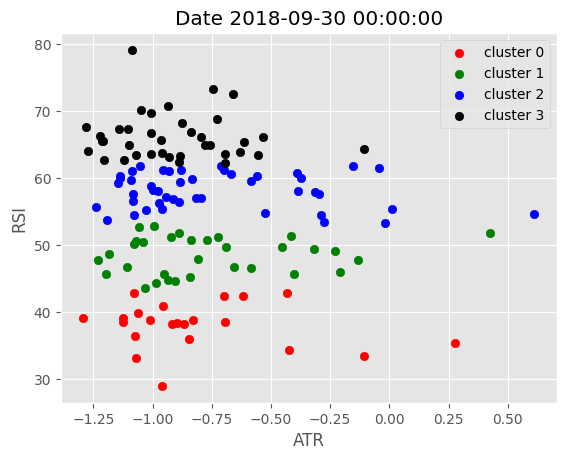

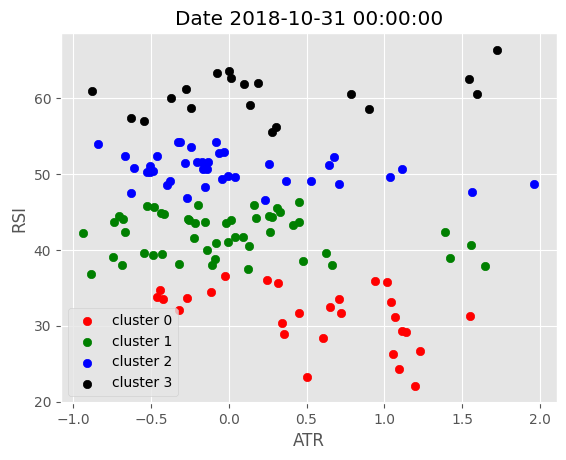

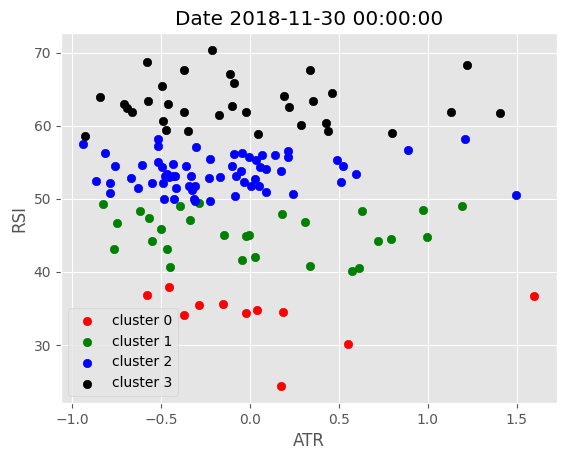

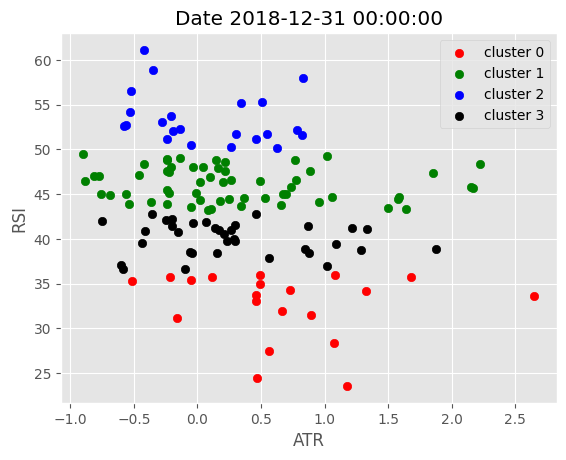

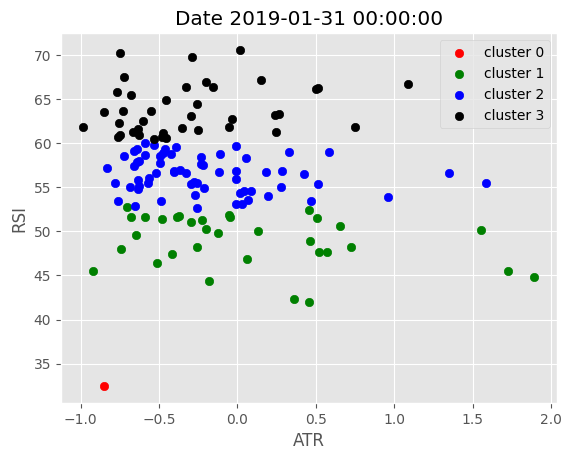

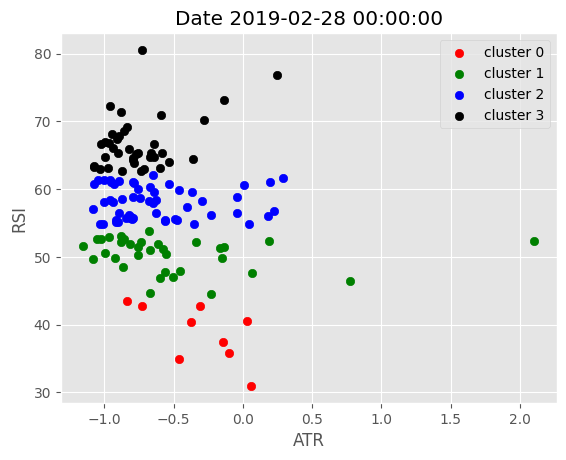

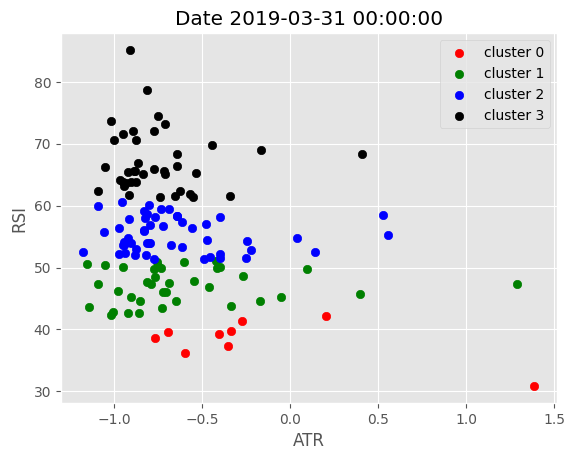

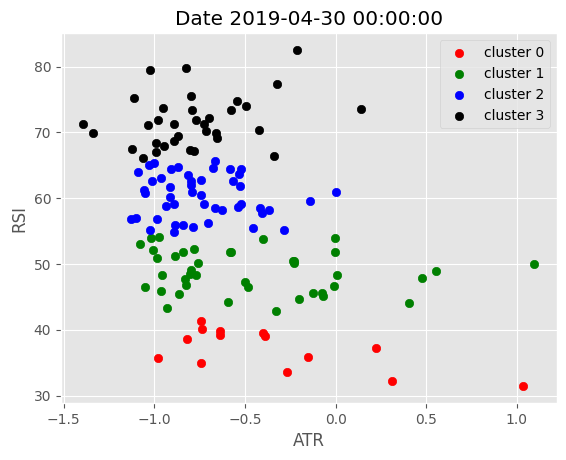

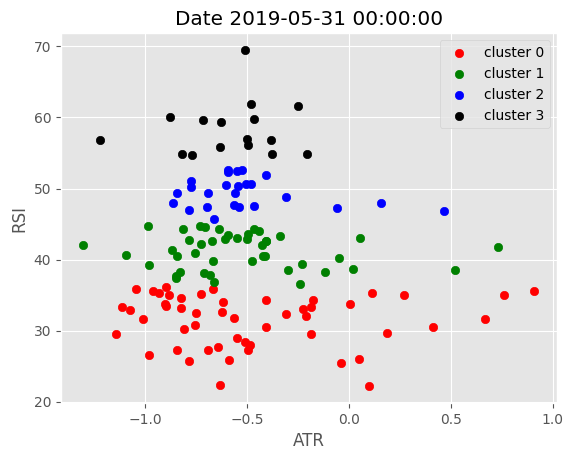

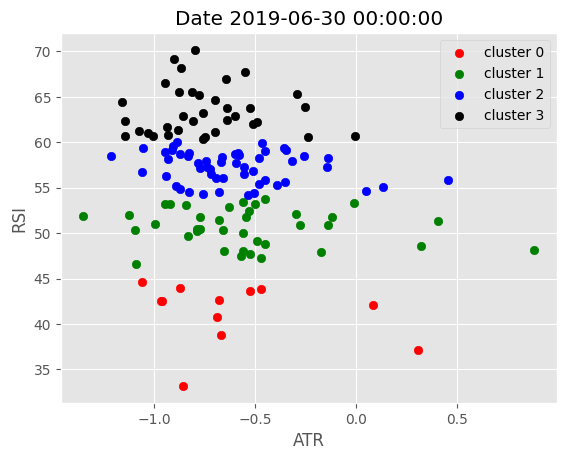

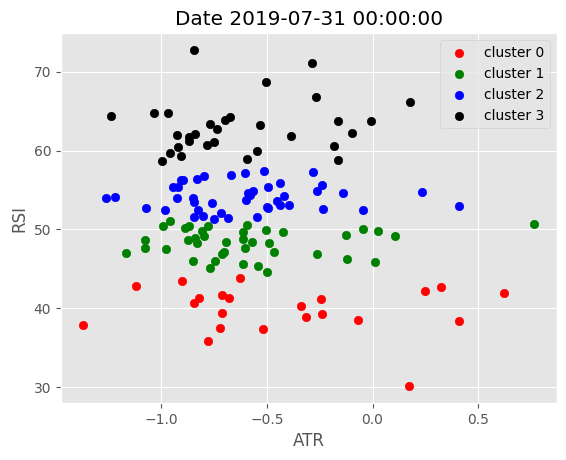

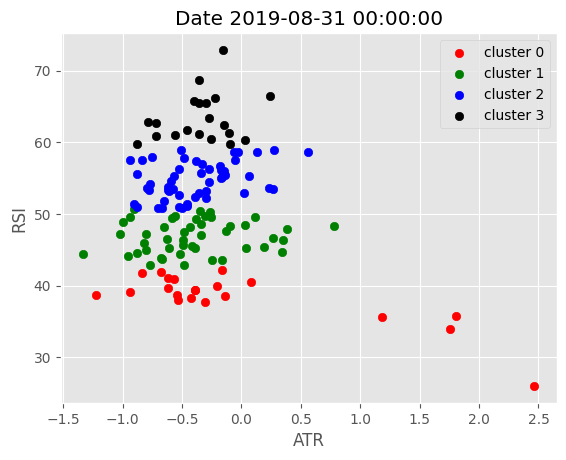

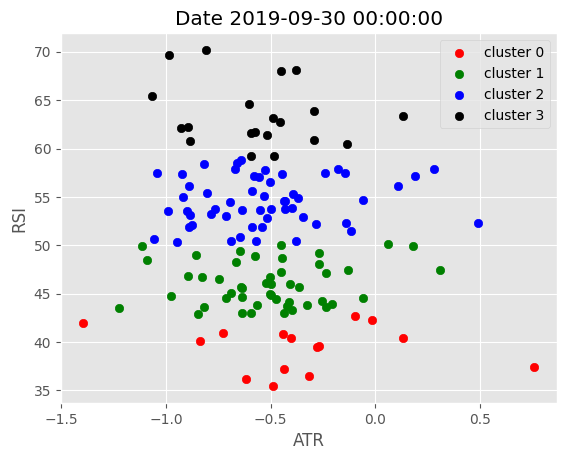

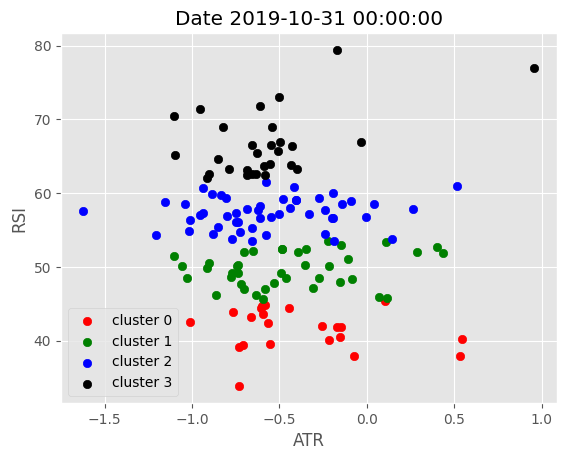

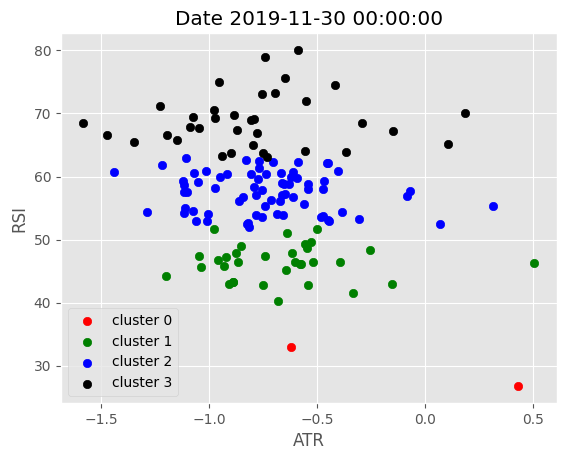

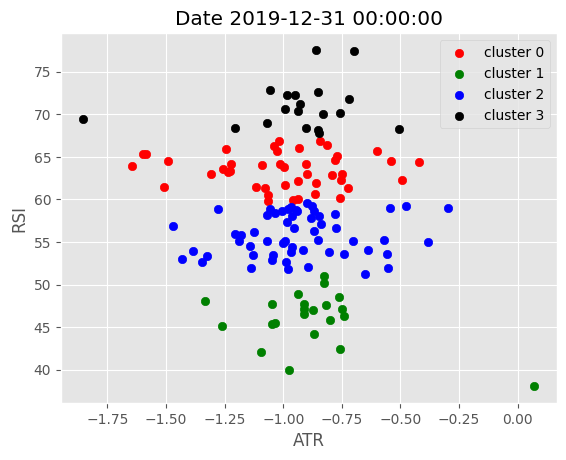

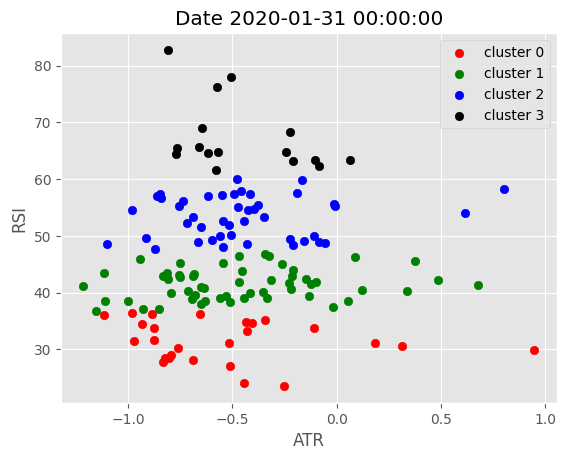

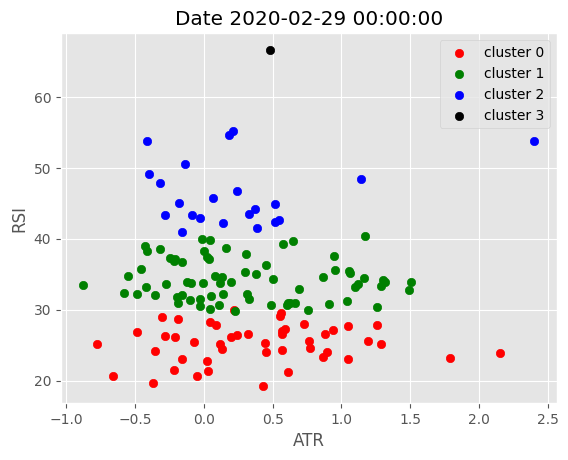

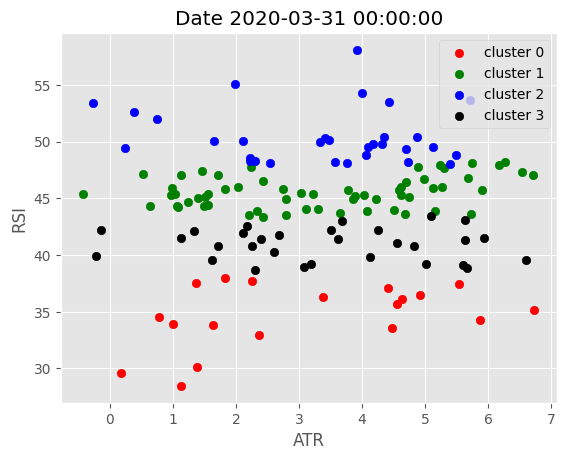

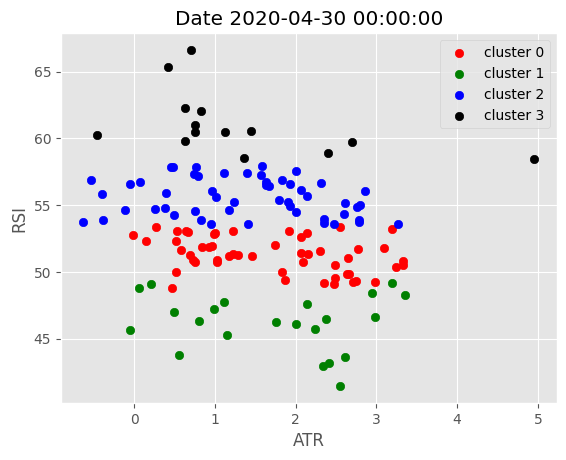

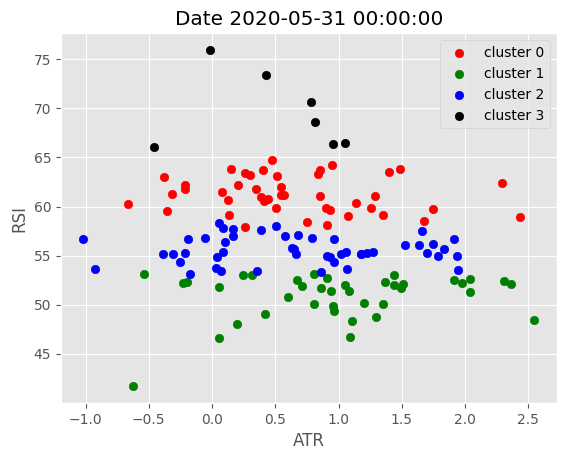

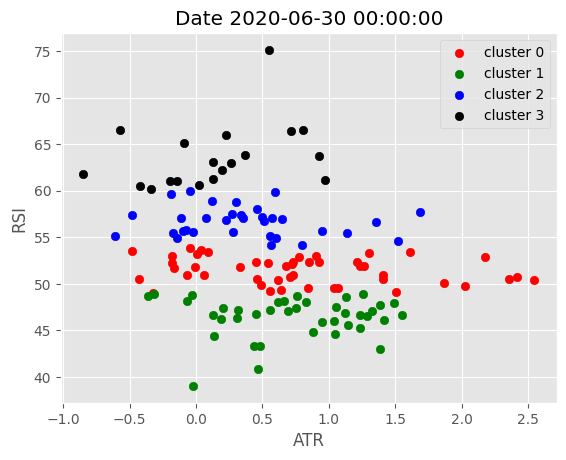

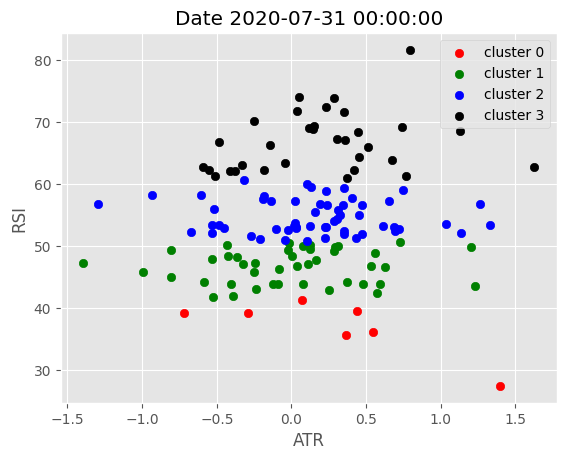

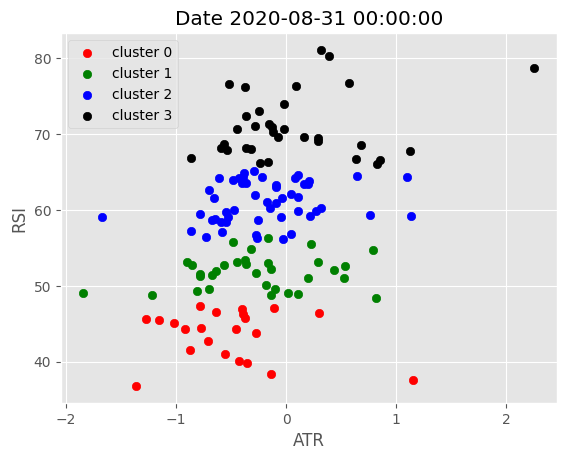

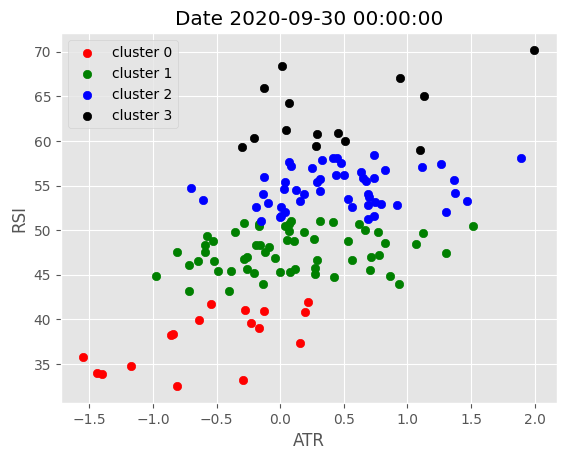

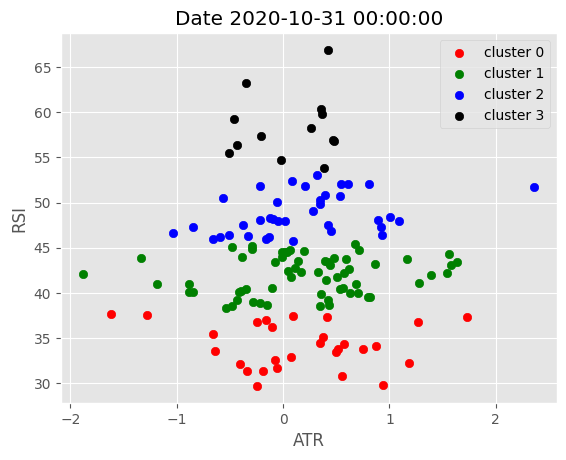

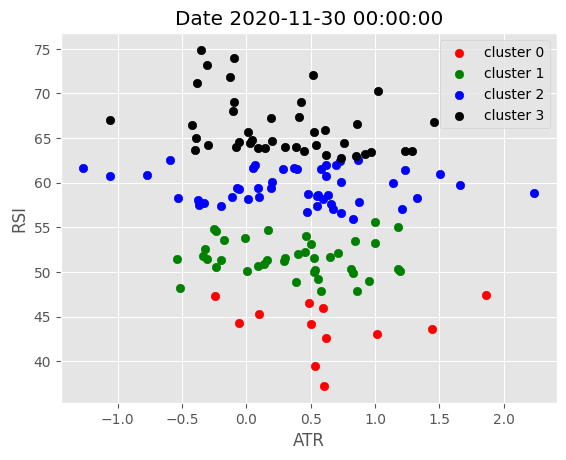

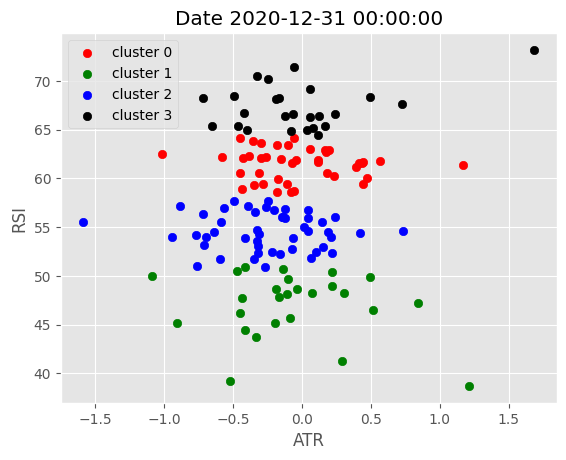

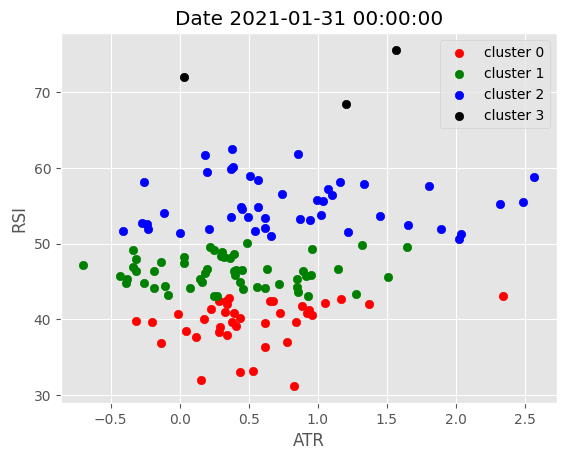

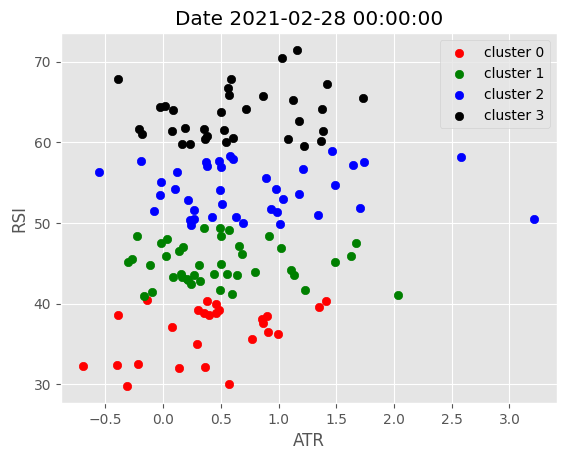

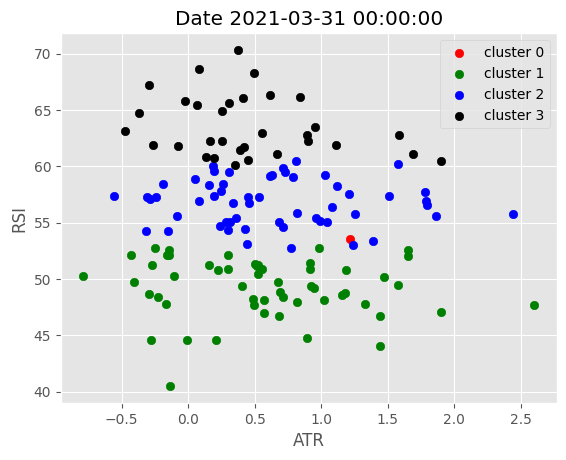

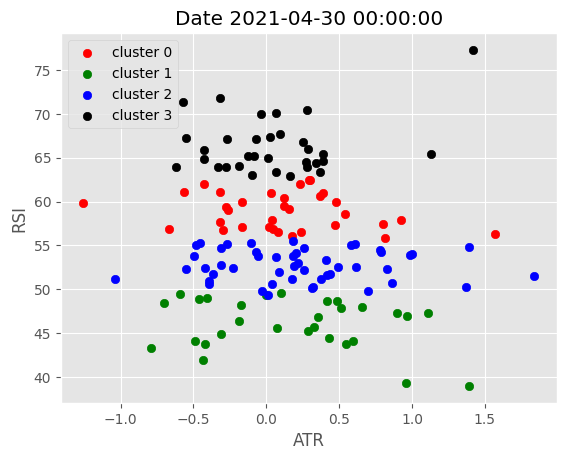

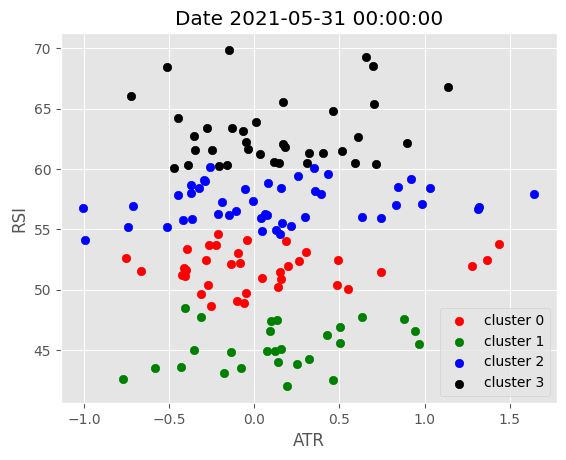

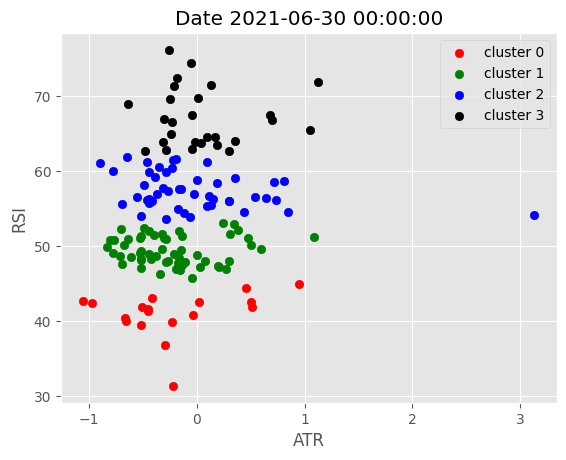

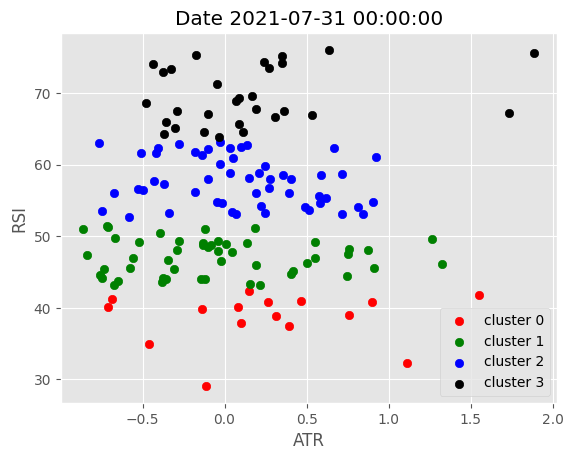

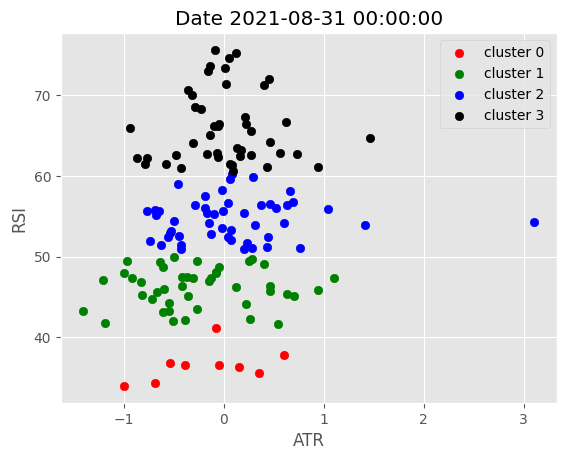

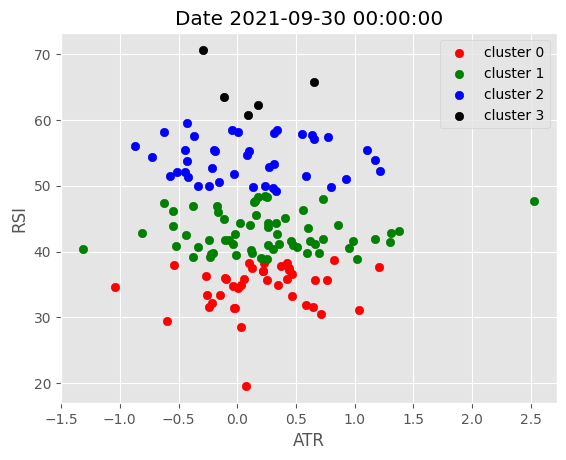

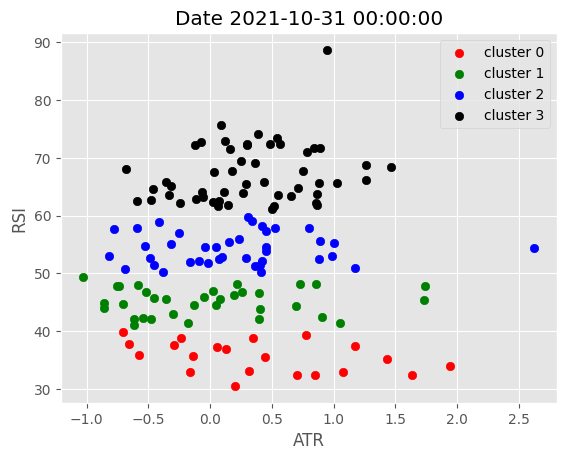

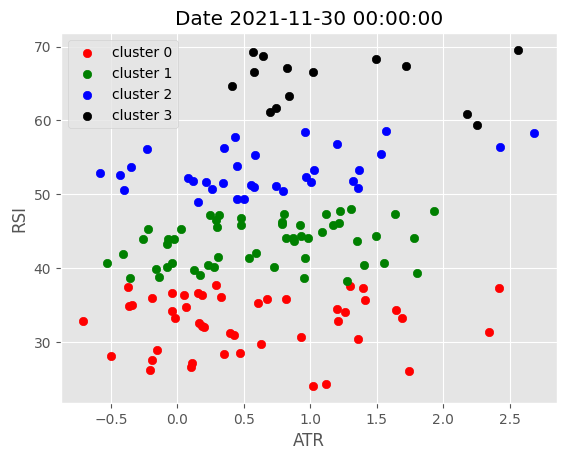

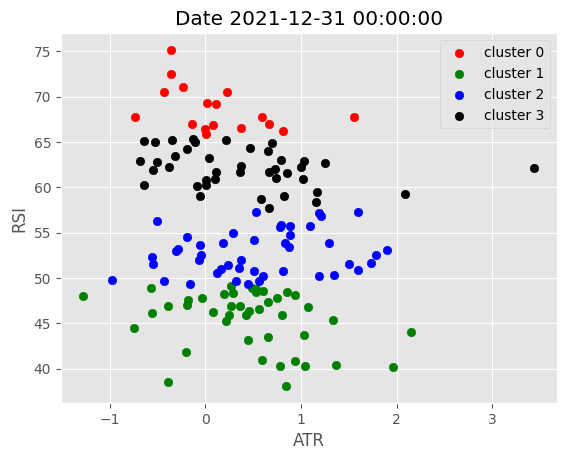

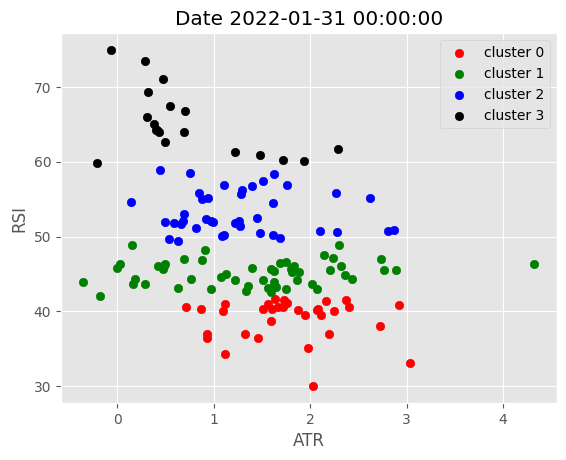

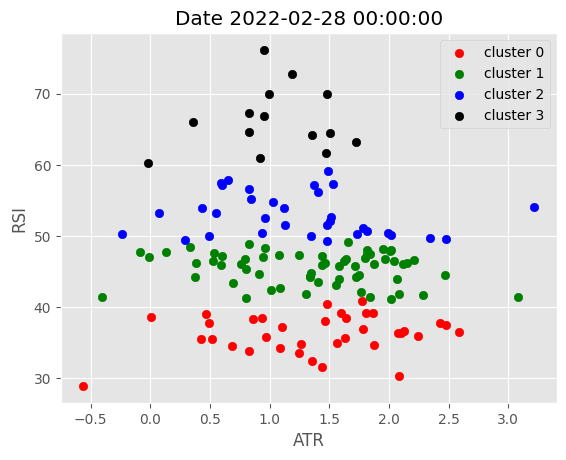

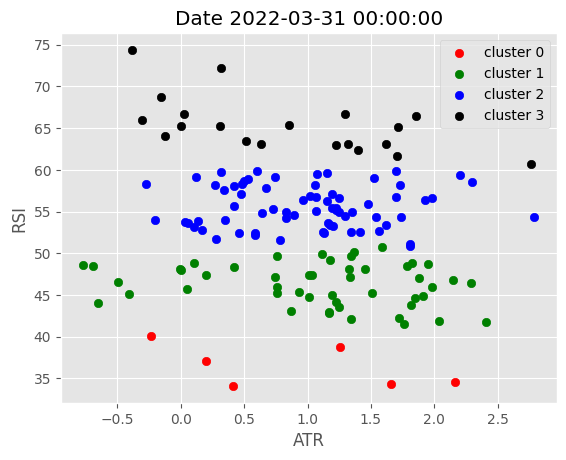

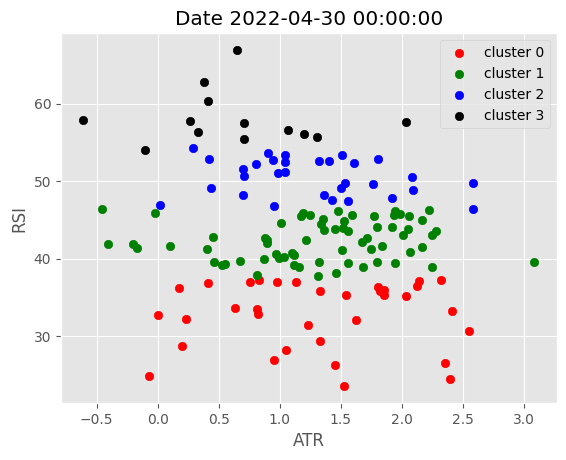

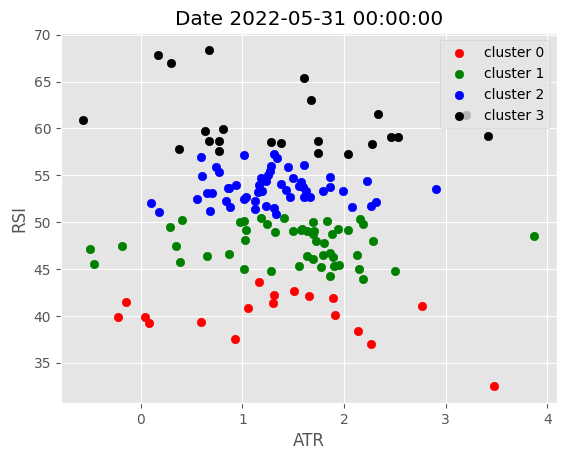

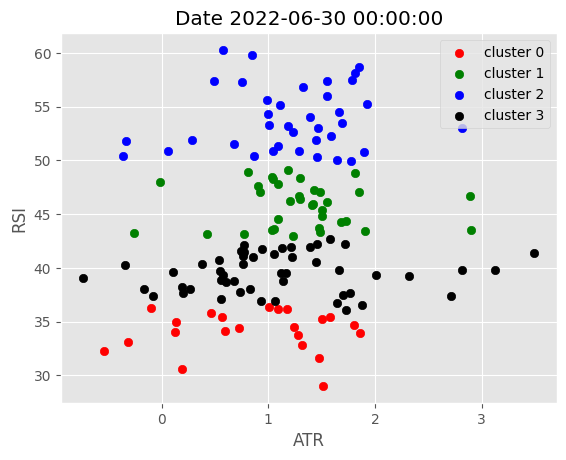

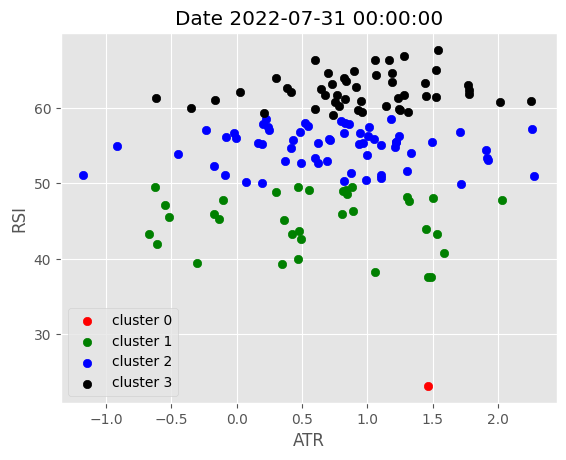

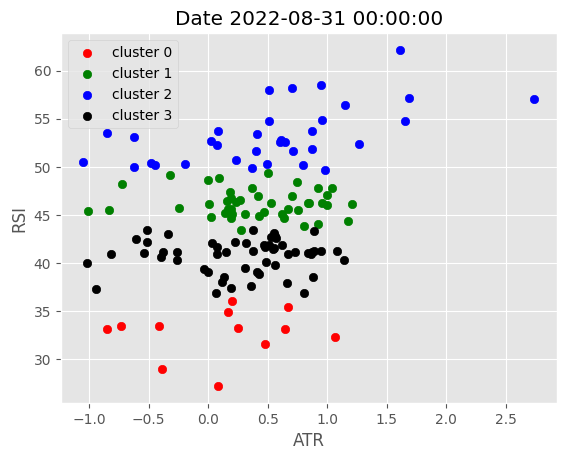

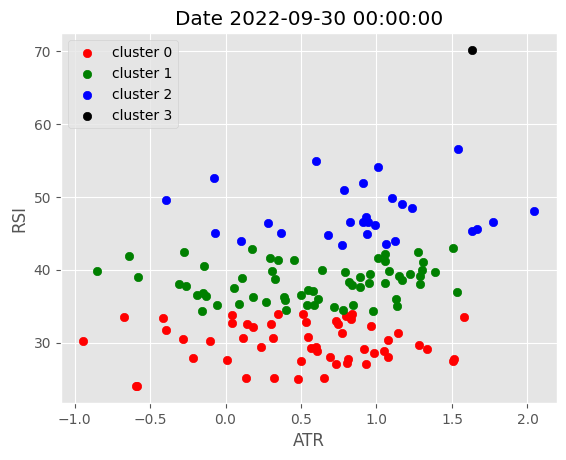

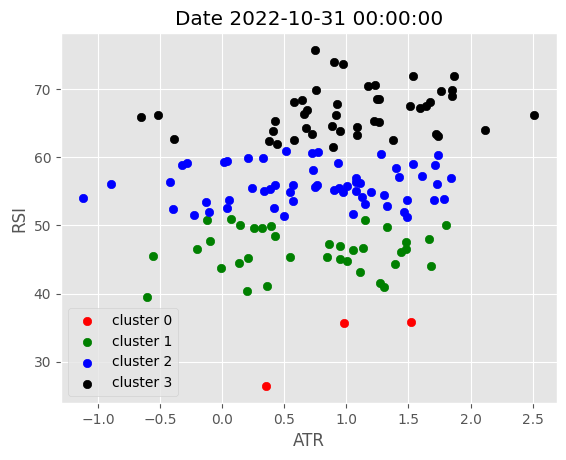

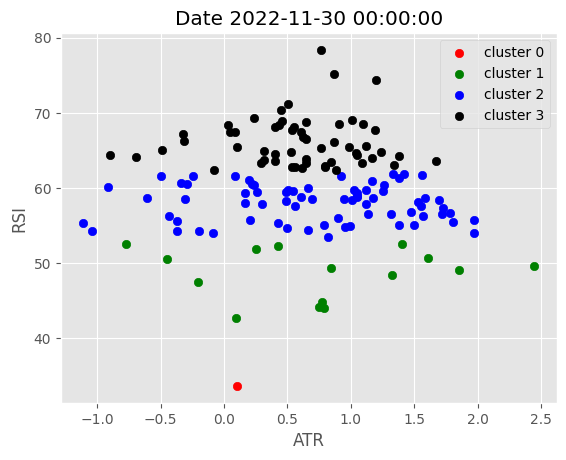

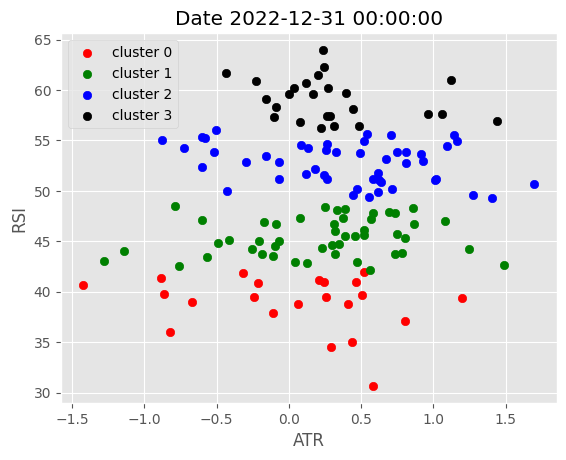

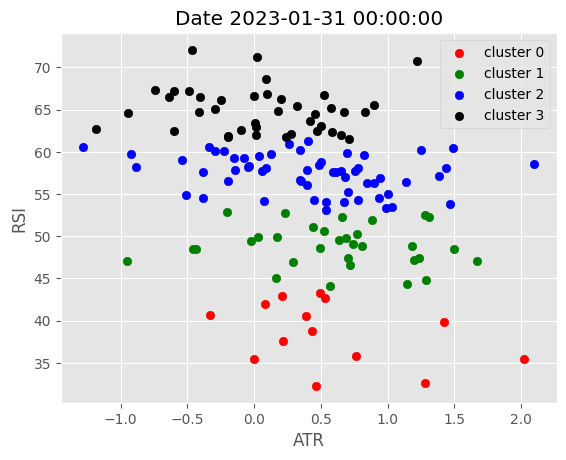

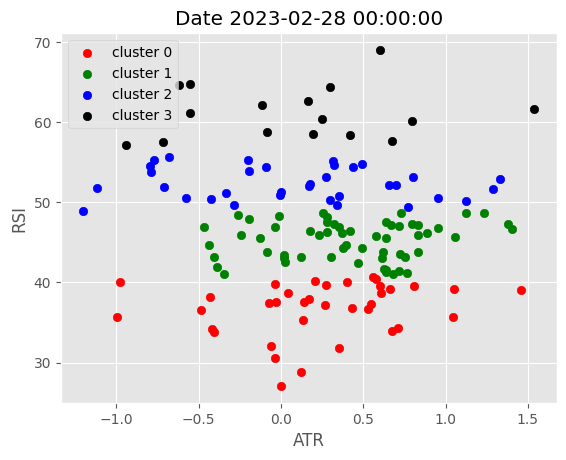

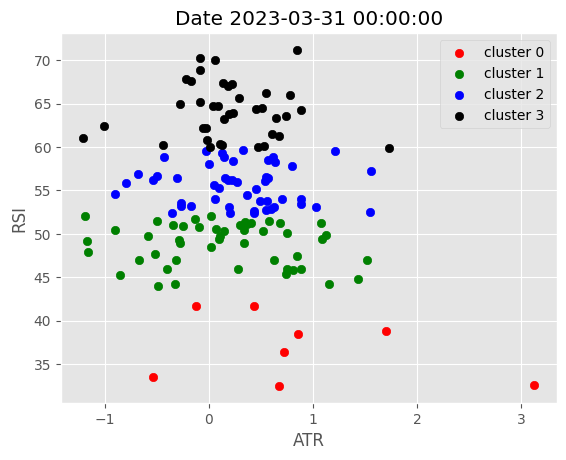

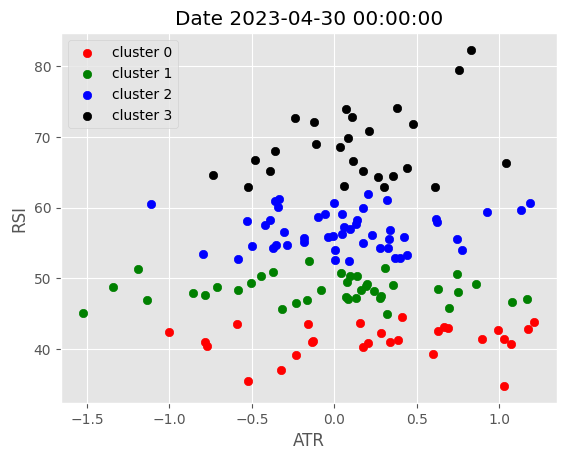

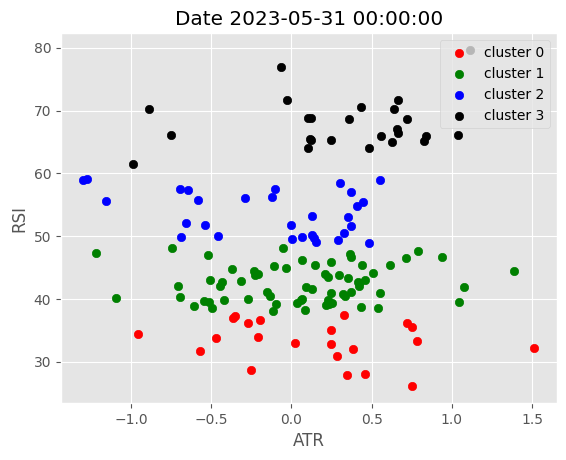

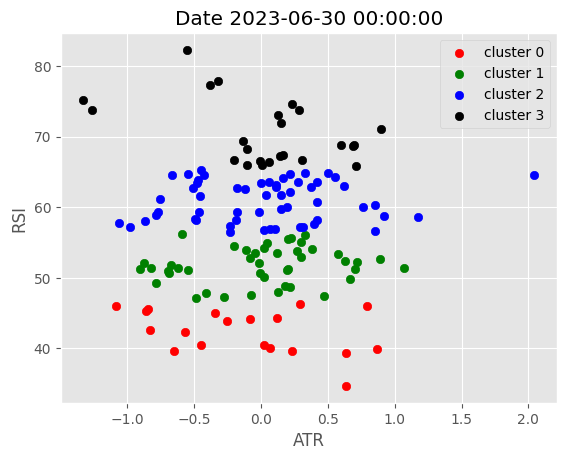

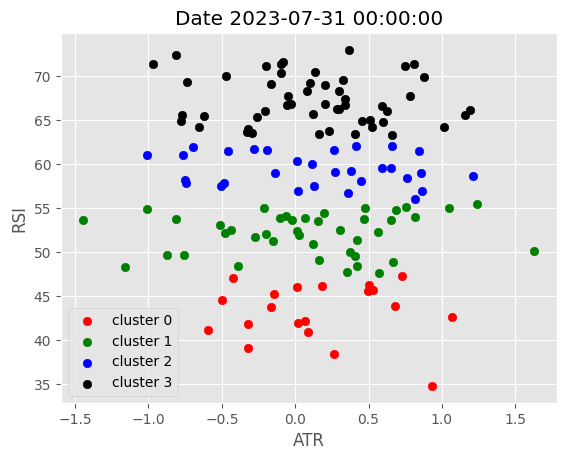

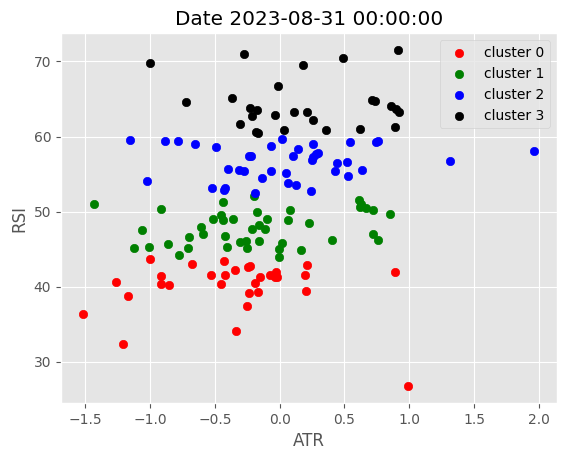

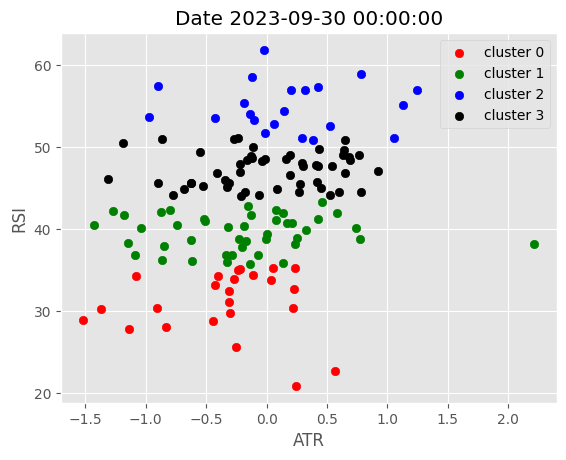

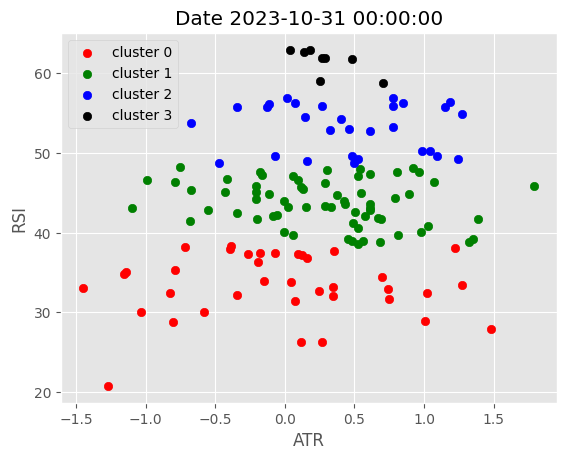

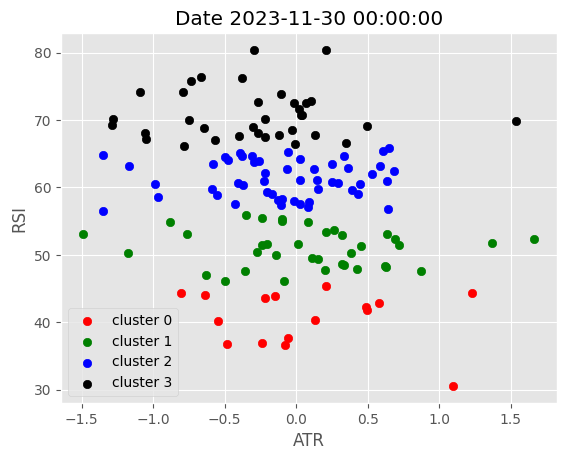

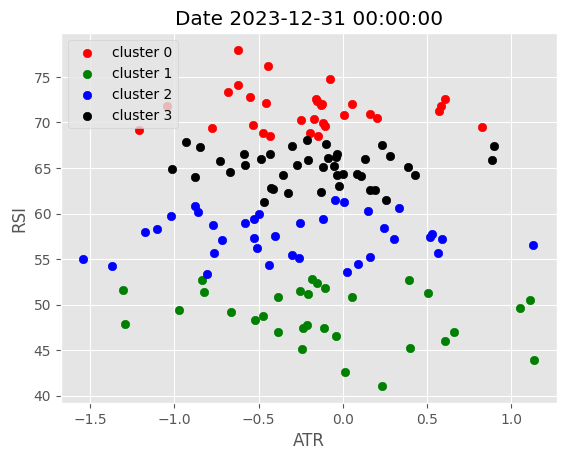

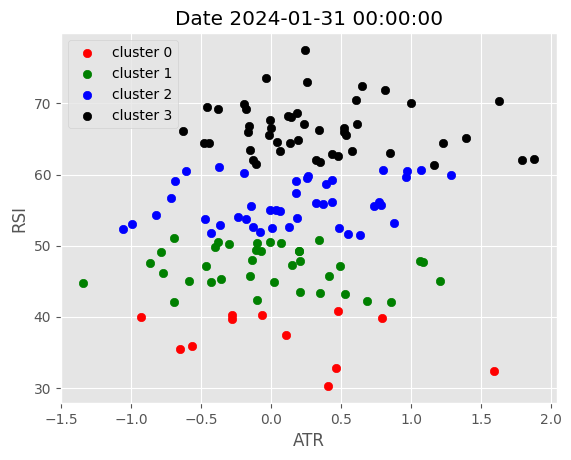

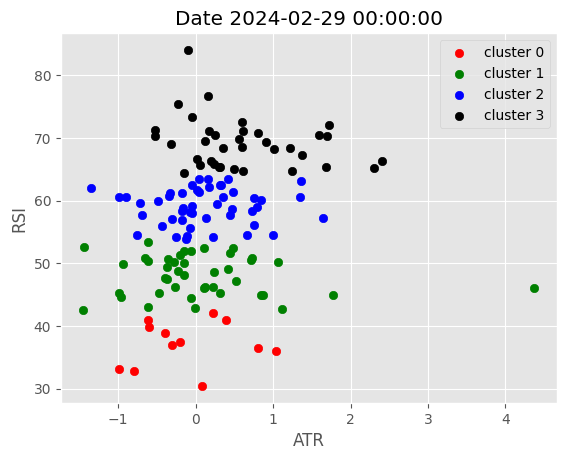

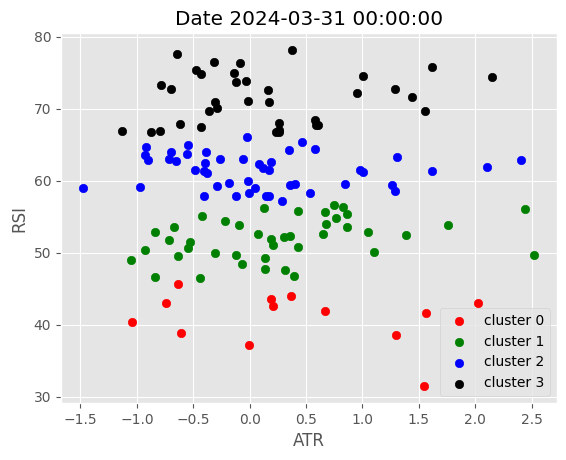

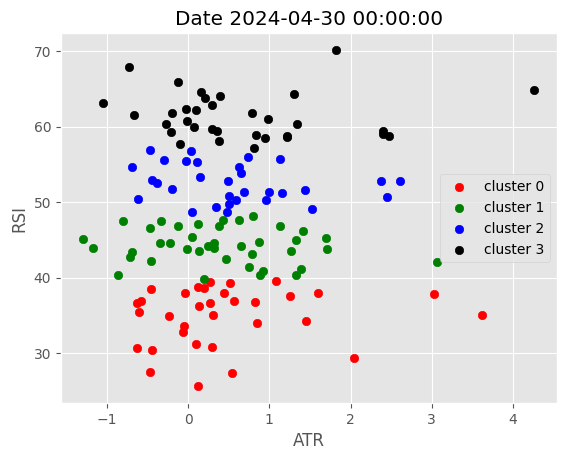

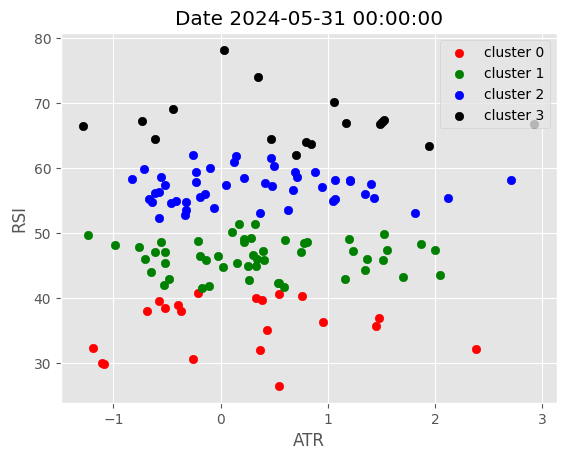

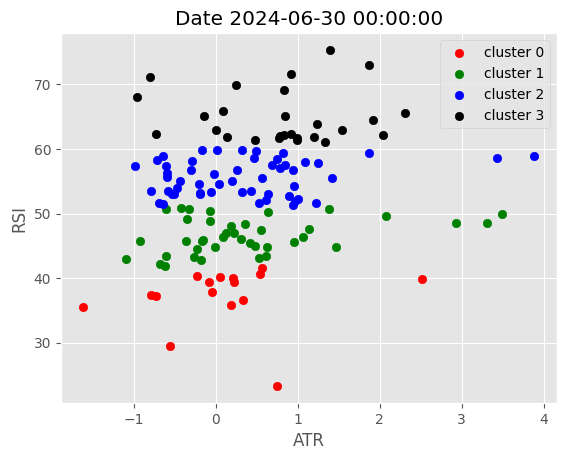

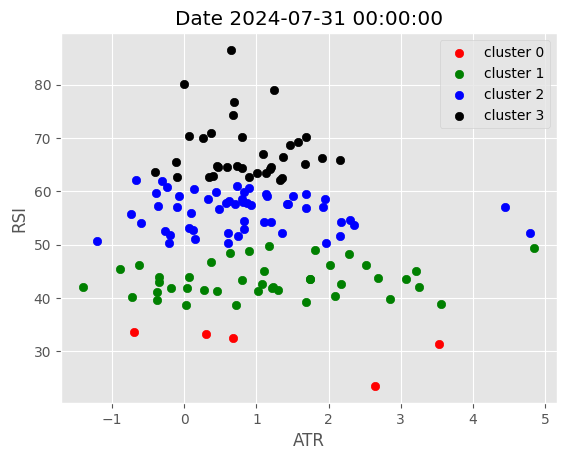

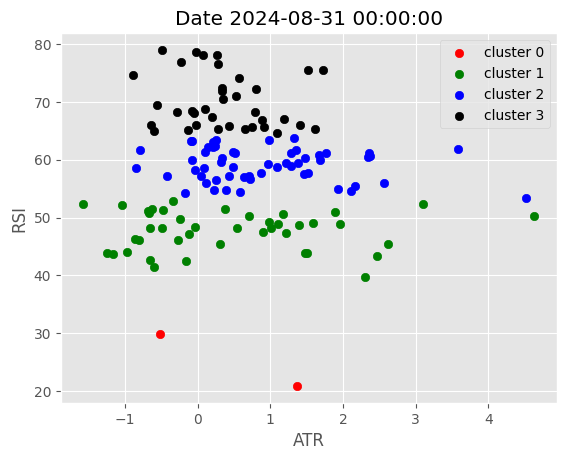

In [274]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():

    g = data.xs(i, level = 0) #lvel = 0 to select all rows wrt to i (date) level 1 would be ticker

    plt.title(f'Date {i}')

    plt.xlabel('ATR')  
    plt.ylabel('RSI')
        
    plot_clusters(g)
    

## Hypothesis
### We are choosing stocks with high RSI (70) to add in our portfolio in a assumption that they would continue to outperform in the following month

In [428]:
#filtered_df = data[data['cluster'] == 3].copy() # makes sure changes in filtered_df doesnt affect data
#filtered_df = filtered_df.reset_index(level=1)
#filtered_df.index = filtered_df.index + pd.DateOffset(1)
# filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])
dates = filtered_df.index.get_level_values('date').unique().to_list()
fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level = 0).index.to_list()
# fixed_dates



1. We have sorted the stocks into portfolios for each month based on RSI hypothesis
2. Now we are to optimize the portfolio to maximize the sharpe ratio

In [429]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [445]:
def optimize_weights(prices, lower_bound=0):
    returns = expected_returns.mean_historical_return(prices = prices, frequency=252)
    cov = risk_models.sample_cov(prices = prices, frequency=252)
    ef = EfficientFrontier(expected_returns=returns,
                            cov_matrix=cov,
                           weight_bounds=(lower_bound, 0.1),
                           solver='SCS'
                          )
    weights = ef.max_sharpe()
    return ef.clean_weights()

- Download fresh daily prices data only for listed stocks

In [446]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers = stocks,
                    start = data.index.get_level_values('date').unique()[0] - pd.DateOffset(months = 12),
                    end =   data.index.get_level_values('date').unique()[-1]                                                                   
                    )

new_df.index = pd.to_datetime(new_df.index)
new_df.index = new_df.index.strftime('%Y-%m-%d')

new_df

[*********************100%***********************]  154 of 154 completed


Price       Adj Close                                                  \
Ticker            AAL        AAPL        ABBV         ABT         ACN   
Date                                                                    
2017-10-02  46.419178   36.094025   66.516495   47.515808  121.396378   
2017-10-03  49.122833   36.251240   66.008759   47.577782  120.329773   
2017-10-04  49.336784   36.016582   66.155945   48.100018  121.145416   
2017-10-05  49.171455   36.464802   66.361984   48.613419  122.095497   
2017-10-06  49.891129   36.443672   66.590096   48.684235  122.122398   
...               ...         ...         ...         ...         ...   
2024-08-26  10.210000  227.179993  197.440002  112.699997  336.779999   
2024-08-27  10.170000  228.029999  195.919998  113.099998  340.380005   
2024-08-28  10.150000  226.490005  195.399994  112.900002  337.390015   
2024-08-29  10.390000  229.789993  195.179993  112.760002  340.209991   
2024-08-30  10.620000  229.000000  196.309998  113.269997  341.950012   

Price                                                                  ...  \
Ticker            ADBE         ADI         ADP        ADSK        AIG  ...   
Date                                                                   ...   
2017-10-02  147.940002   75.141594   94.806892  112.470001  51.633636  ...   
2017-10-03  148.600006   75.211647   96.012367  113.629997  51.441662  ...   
2017-10-04  147.949997   76.174759   96.610756  114.050003  51.399921  ...   
2017-10-05  150.250000   76.954018   98.492653  116.540001  51.733791  ...   
2017-10-06  151.119995   76.936508   98.414604  116.959999  51.967506  ...   
...                ...         ...         ...         ...        ...  ...   
2024-08-26  559.440002  224.726151  271.350006  256.209991  74.610001  ...   
2024-08-27  567.820007  230.931747  274.679993  256.989990  74.430000  ...   
2024-08-28  560.539978  226.280045  272.679993  254.619995  75.519997  ...   
2024-08-29  569.630005  229.985474  273.359985  258.230011  76.120003  ...   
2024-08-30  574.409973  233.919998  275.910004  258.399994  77.050003  ...   

Price        Volume                                                           \
Ticker            V      VLO     VRTX        VZ       WBA      WDC       WFC   
Date                                                                           
2017-10-02  4885600  3141300  2057700   9525800   5513900  7502300  11764400   
2017-10-03  4411100  3194700   995000  10218600   4934300  4576500  17405100   
2017-10-04  4146800  2669900   970200   9887500   4652600  3414300  14697800   
2017-10-05  4396100  4923400  1273700  12230600   4622700  5481400  14560700   
2017-10-06  4587000  4672400  1551100  13239600  11629900  3489900  11151200   
...             ...      ...      ...       ...       ...      ...       ...   
2024-08-26  4612200  2752200   877600  10309500  15856600  3247200   9478800   
2024-08-27  6594100  2030300  1062200   9778200  45243600  5045700   7638500   
2024-08-28  5455100  2139700   942200  12732700  24787100  4673100  11905200   
2024-08-29  5565100  2275000   706700  17338100  24711900  4321200   9283300   
2024-08-30  6296100  3359500  1809700  20009900  19590400  6416500  20377300   

Price                                    
Ticker           WMT     WYNN       XOM  
Date                                     
2017-10-02  23127600  3006000   6777900  
2017-10-03  23810100  1709000   6082000  
2017-10-04  18520200  1525000   6357100  
2017-10-05  15416100  1718500   7375900  
2017-10-06  18740100  3339400   6070600  
...              ...      ...       ...  
2024-08-26   9508200  1315400  13671000  
2024-08-27  11557800  1135500   9991600  
2024-08-28   9814300  3012700  10742900  
2024-08-29  11856800  1672400  10753900  
2024-08-30  23230000  3939500  13284700  

[1740 rows x 924 columns]

In [459]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date)+ pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d') #end of month of start date
        cols = fixed_dates[start_date]
        
    
        optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    
        optimization_df = new_df['Adj Close'].loc[optimization_start_date:optimization_end_date, cols]
    
        # print('start date: ', start_date)
        # print('end date: ', end_date)
        # print('stocks: ', cols)
        # print('opt start date: ', optimization_start_date)
        # print('opt end date: ', optimization_end_date)
        success = False
    
        try:
            weights = optimize_weights(prices = optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))
            # print('lower bound: ', round(1/(len(optimization_df.columns)*2),3))
        
            weights = pd.DataFrame(weights, index = pd.Series(0))
    
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
    
        if success==False:
                weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                         index=optimization_df.columns.tolist(),
                                         columns=pd.Series(0)).T
    
        temp_df = returns_dataframe[start_date:end_date]
        temp_df_stacked = temp_df.stack()
        
        # Rename the 'Ticker' level of the index (which is the second level)
        temp_df_stacked.index = temp_df_stacked.index.rename(None, level=1)
        
        temp_df = temp_df_stacked.to_frame('return').reset_index(level = 0)\
                        .merge(weights.stack().to_frame('weight').reset_index(level = 0, drop = True),
                               left_index = True, right_index = True)\
                        .reset_index().set_index(['Date', 'index']).unstack().stack()
        
        temp_df.index.names = ['date', 'ticker']
    
        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']
    
        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')
    
        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print('error as of :',end_date)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df
        
    

Max Sharpe Optimization failed for 2019-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-06-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2023-11-01, Continuing with Equal-Weights
error as of : 2024-09-30


,Strategy Return
date,
2018-10-01,0.004618
2018-10-02,-0.005420
2018-10-03,-0.001752
2018-10-04,-0.006573
2018-10-05,-0.004013
...,...
2024-08-26,0.004264
2024-08-27,0.003156
2024-08-28,0.002302


In [426]:
# optimization_df = new_df['Adj Close'].loc['2017-10-01':'2018-09-30', fixed_dates['2018-10-01']]
# # optimization_df.index.drop
# optimization_df

Ticker,ABT,ADP,ADSK,AMD,AMGN,AVGO,CAT,CI,COP,CSCO,...,SBUX,TGT,TJX,TMO,TMUS,ULTA,UNP,V,VRTX,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-02,47.515816,94.806877,112.470001,12.710000,151.650742,19.190075,106.046295,177.089493,40.227203,27.231323,...,46.433010,49.041904,33.215416,188.307266,60.579788,223.800003,98.976181,100.475456,152.229996,56.485561
2017-10-03,47.577774,96.012367,113.629997,13.420000,151.699356,19.112671,106.718025,179.881561,39.371655,27.312006,...,46.588329,48.783737,33.405479,187.117706,60.737339,227.619995,98.658463,100.618378,152.509995,56.625671
2017-10-04,48.100025,96.610741,114.050003,13.310000,152.801285,19.312174,107.763824,178.719742,39.427635,27.214344,...,46.536568,48.850368,33.328548,190.243973,60.560089,223.520004,97.696693,100.351562,152.509995,55.917751
2017-10-05,48.613415,98.492661,116.540001,13.340000,151.391495,19.445442,107.474754,178.654160,39.739471,27.336418,...,47.114697,48.617191,33.400940,190.165375,60.579788,220.630005,97.911369,101.237770,152.300003,56.743652
2017-10-06,48.684238,98.414619,116.959999,13.230000,150.556946,19.610636,107.925400,178.907135,39.067818,27.466635,...,47.606552,47.567902,33.305916,189.949051,61.456184,219.910004,97.851265,101.704727,155.100006,53.978378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-24,64.445343,131.986053,152.830002,32.610001,172.795898,20.759653,133.816528,190.466354,62.792942,40.347088,...,50.048637,75.232216,50.511574,238.791977,67.866684,280.989990,143.140793,143.032593,182.169998,54.538914
2018-09-25,65.130943,131.826675,155.399994,32.570000,172.170456,20.609856,133.894714,188.835678,63.648537,40.372070,...,50.234047,75.292580,50.787785,239.718979,68.388588,277.459991,143.175903,143.483505,182.649994,54.546478
2018-09-26,65.708252,132.473068,154.820007,32.189999,172.479004,20.425097,133.095322,189.707230,62.972202,40.322094,...,50.560688,75.792740,51.441513,239.482269,67.738678,278.329987,142.798706,143.186127,186.649994,55.113010


In [442]:
temp_df = returns_dataframe[start_date:end_date]
temp_df_stacked = temp_df.stack()

# Rename the 'Ticker' level of the index (which is the second level)
temp_df_stacked.index = temp_df_stacked.index.rename(None, level=1)

temp_df = temp_df_stacked.to_frame('return').reset_index(level = 0)\
                .merge(weights.stack().to_frame('weight').reset_index(level = 0, drop = True),
                       left_index = True, right_index = True)\
                .reset_index().set_index(['Date', 'index']).unstack().stack()
temp_df

return   weight
Date       index                   
2020-03-02 ADBE   0.042989  0.03100
           ADSK  -0.000262  0.03100
           AMZN   0.036589  0.03100
           CHTR   0.007998  0.11760
           CRM    0.036644  0.03100
...                    ...      ...
2020-03-31 MDLZ  -0.020750  0.03100
           MSFT  -0.015852  0.03100
           NEE   -0.022153  0.40274
           NOW    0.000663  0.03100
           TSLA   0.042633  0.04461

[352 rows x 2 columns]

In [409]:
weights

,ABT,ADP,ADSK,AMD,AMGN,AVGO,CAT,CI,COP,CSCO,...,SBUX,TGT,TJX,TMO,TMUS,ULTA,UNP,V,VRTX,WBA
0,0.014,0.014,0.014,0.1,0.014,0.014,0.014,0.014,0.08428,0.014,...,0.014,0.06008,0.1,0.014,0.014,0.014,0.014,0.014,0.014,0.014


In [470]:
spy = yf.download(tickers='SPY',
                  start=start_date,
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

# portfolio_df = portfolio_df.merge(spy_ret,
#                                   left_index=True,
#                                   right_index=True)

# portfolio_df

[*********************100%***********************]  1 of 1 completed


In [477]:
portfolio_df.index = pd.to_datetime(portfolio_df.index)
portfolio_df.index.name = 'Date'
portfolio_df
start_date = max(portfolio_df.index.min(), spy_ret.index.min())
end_date = min(portfolio_df.index.max(), spy_ret.index.max())
portfolio_df = portfolio_df.loc[start_date:end_date]
spy_ret = spy_ret.loc[start_date:end_date]
merged_df = portfolio_df.merge(spy_ret, left_index=True, right_index=True, how='outer')
merged_df = merged_df.fillna(method='ffill')
portfolio_df = merged_df

In [471]:
spy_ret

,SPY Buy&Hold
Date,
2018-10-02,-0.000583
2018-10-03,0.000549
2018-10-04,-0.007846
2018-10-05,-0.005613
2018-10-08,0.000000
...,...
2024-08-29,0.000090
2024-08-30,0.009501
2024-09-03,-0.020794


In [472]:
portfolio_df

,Strategy Return
Date,
2018-10-01,0.004618
2018-10-02,-0.005420
2018-10-03,-0.001752
2018-10-04,-0.006573
2018-10-05,-0.004013
...,...
2024-08-26,0.004264
2024-08-27,0.003156
2024-08-28,0.002302


In [476]:
merged_df

,Strategy Return,SPY Buy&Hold
Date,,
2018-10-02,-0.005420,-0.000583
2018-10-03,-0.001752,0.000549
2018-10-04,-0.006573,-0.007846
2018-10-05,-0.004013,-0.005613
2018-10-08,-0.002963,0.000000
...,...,...
2024-08-26,0.004264,-0.002387
2024-08-27,0.003156,0.001372
2024-08-28,0.002302,-0.005822


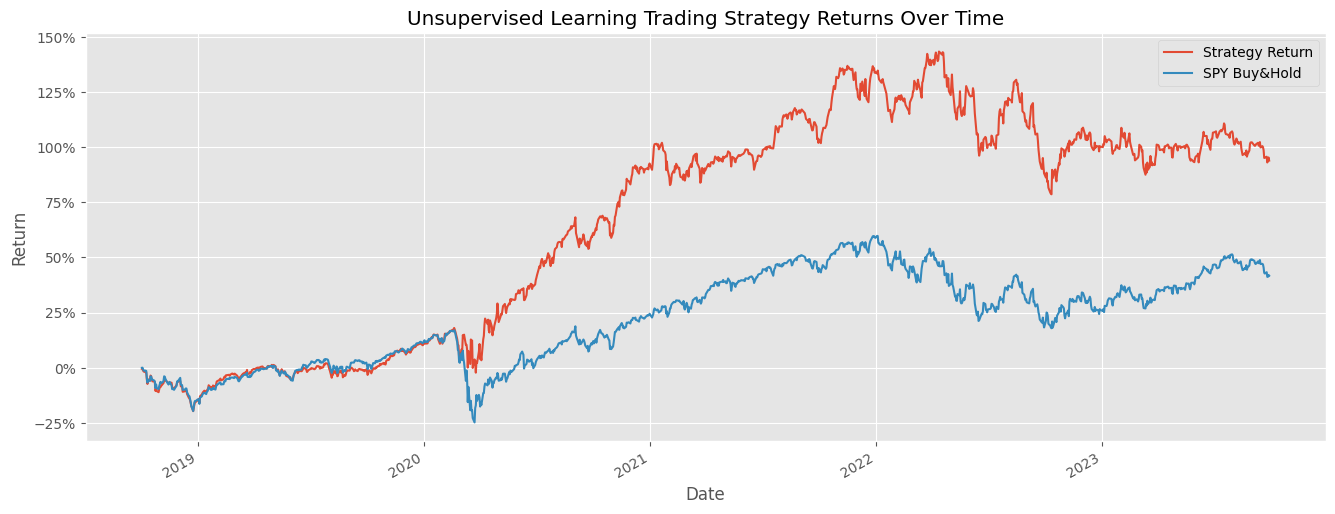

In [478]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()